<a href="https://colab.research.google.com/github/jermwatt/computational_maths/blob/collab/Part_2_elementary_components.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Computational Mathematics

# Part 2: Elementary functions and operations

In this post we review a variety of elementary functions often seen in the study of machine learning / deep learning, well as various ways of these combining elementary functions to create an un-ending array of interesting and complicated functions with known equations.  These elementary functions are used extensively throughout not only the study of machine learning / deep learning, but throughout many areas of science in general. 

In [ ]:
# import standard libs
import os
from pathlib import Path 
import pandas as pd
import numpy as np
from IPython.display import Image
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# setup steps if running on local machine / container
if not os.getenv("COLAB_RELEASE_TAG"):
    # make sure autograd is installed on machine / container
    !pip3 install autograd
    
    # append path to data / custom library
    import sys
    sys.path.append('../')
    
    # import custom library
    from compmaths_libraries import basics_library as baslib
else: # # setup steps if running on collab
    # install github clone - allows for easy cloning of subdirectories
    !pip install github-clone

    # clone library subdirectory
    if not Path('compmaths_libraries').is_dir():
      !ghclone https://github.com/jermwatt/computational_maths/tree/collab/compmaths_libraries 
    else:
      print('compmaths_libraries already cloned!')

    from compmaths_libraries import basics_library as baslib

    # clone datasets
    if not Path('compmaths_data').is_dir():
      !ghclone https://github.com/jermwatt/computational_maths/tree/collab/compmaths_data
    else:
      print('compmaths_data already cloned!')

    # clone work images
    if not Path('compmaths_images').is_dir():
      !ghclone https://github.com/jermwatt/computational_maths/tree/collab/compmaths_images
    else:
      print('compmaths_images already cloned!')

    # clone demo output images
    if not Path('demo_images').is_dir():
      !ghclone https://github.com/jermwatt/computational_maths/tree/collab/demo_images
    else:
      print('demo_images already cloned!')

## 1.1 Polynomials

Polynomial functions are perhaps the first set of elementary functions with known equations one learns about.  They are simple- mathematical objects - when we are dealing with only one input $x$ each polynomial function simply raises the input to a given power.  For example, the first three polynomial functions look like

\begin{equation}
f_1(x) = x^1, ~~ f_2(x) = x^2,~~ f_3(x)=x^3
\end{equation}

Notice how the first element here, written as $f_1(x) = x^1$  (often written just as $f_1(x) = x$, ignoring the superscript $1$), is a simple line with slope one and zero intercept - and the second, $f_2(x) = x^2$, a simple parabola.  We can go on as well listing more polynomials, one for each positive whole number with the $m^{th}$ polynomial taking the form $f_m(x) = x^m$.  Because of this indexing of powers the polynomials naturally form a *catalog or family of functions*.  So there are an infinite number of polynomials - one for each positive whole number $1,2,3,4,....$.  

Using their equations we can graph a sample of table values for the first few non-constant polynomial elements - which we do in the next Python cell.

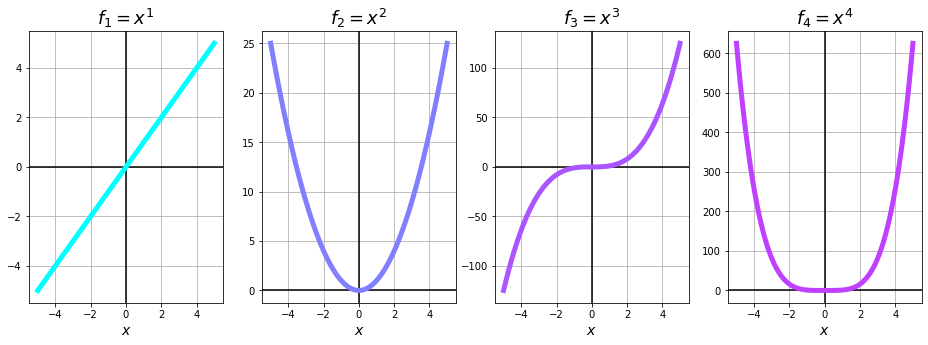

In [2]:
# plot the first few polynomials
baslib.basics_plotter.poly_2d_plotter()

#### <span style="color:#a50e3e;">Example. </span>  General trend fitting: student debt in the U.S.

The degree one polynomial - otherwise known as a line - is one of the most common models used for low dimensional data fitting.  Take for example the plot shown below taken from <a target="_blank" href="https://github.com/jermwatt/machine_learning_refined">Machine Learning Refined</a> - showing total student loan debt (money students borrow to pay for university fees and tuition) held in the United States.  Measured quarterly from 2006 to 2014 the overall trend of the data - upward and onward to well over one trillion U.S. dollars - is quite linear, hence a line (a degree one polynomial) models this data quite well, allowing one to make accurate predictions about its future value.  

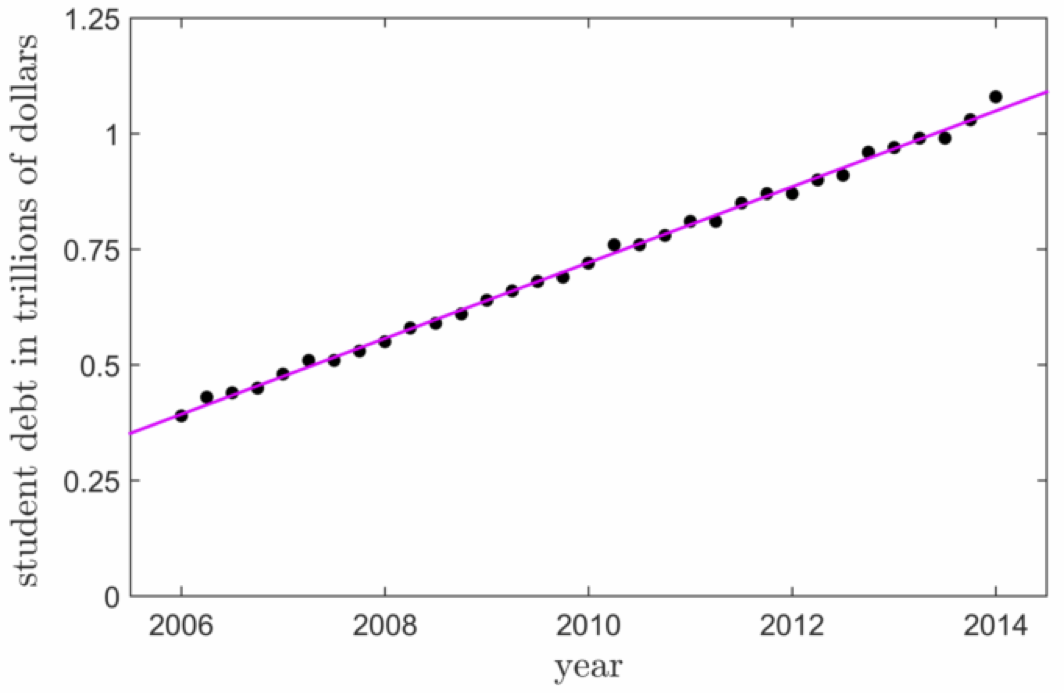

In [3]:
Image(filename = "compmaths_images/student_debt_plot.png", width=500, height=300)

#### <span style="color:#a50e3e;">Example. </span>  Galileo and polynomial modeling of gravity

In 1638 Galileo Galilei, infamous for his expulsion from the Catholic church for daring to claim that the earth orbited the sun and not the converse (as was the prevailing belief at the time) published his final book: Discourses and Mathematical Demonstrations Relating to Two New Sciences. In this book, written as a discourse among three men in the tradition of Aristotle, he described his experimental and philosophical evidence for the notion of uniformly accelerated physical motion. Specifically, Galileo (and others) had intuition that the acceleration of an object due to (the force we now know as) gravity is uniform in time, or in other words that the distance an object falls is directly proportional (i.e., linearly related) to the amount of time it has been traveling, squared - perfectly modeled by a weighted degree two polynomial.  This relationship was empirically solidified using the following ingeniously simple experiment performed by Galileo.

Repeatedly rolling a metal ball down a grooved 5 and 1/2 meters long piece of wood set at an incline - shown figuratively in the plot below taken from <a target="_blank" href="https://github.com/jermwatt/machine_learning_refined">Machine Learning Refined</a> - Galileo timed how long the ball took to get 1/4,1/2, 2/3, 3/4, and all the way down the wood ramp.

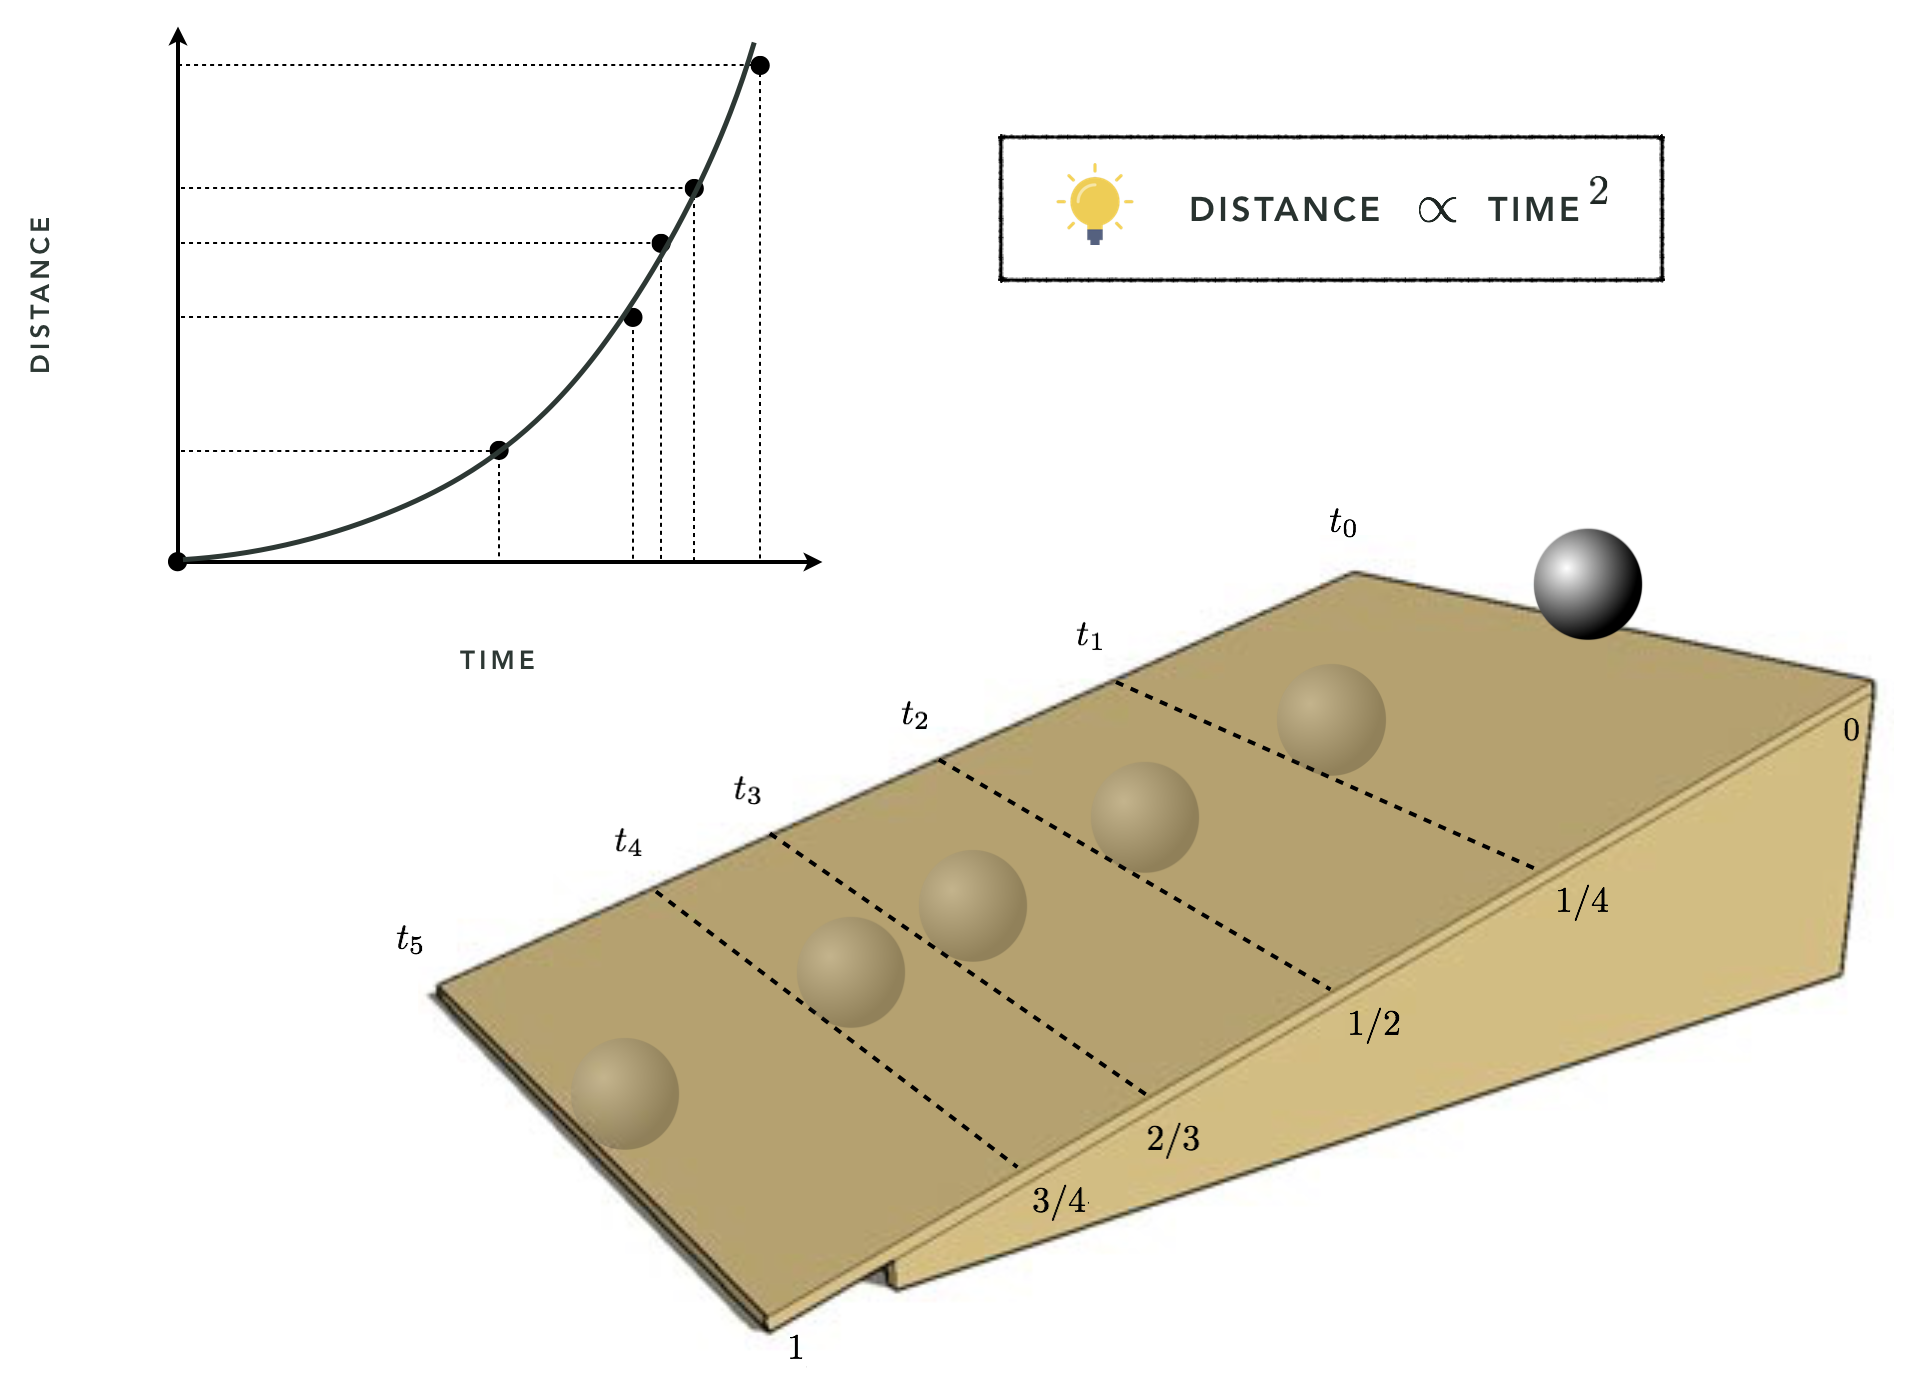

In [6]:
Image(filename = "compmaths_images/galelio_ramp.png", width=500, height=400)

-----

When we have two inputs - $x_1$ and $x_2$ - we also have a catalog of polynomial elements - polynomial functions with known equations.  However now that we have two input elements, the form of each polynomial involves raising both inputs to a power and multiplying the result.  The first three polynomial equations look like this

$$f_1(x_1,x_2) = x_1, ~~ f_2(x_1,x_2) = x_2,  ~~ f_3(x_1,x_2) = x_1x_2, ~~ f_4(x_1,x_2) = x_1^{~}x_2^2$$

Basically to create these polynomials of two inputs we pick two nonnegative whole numbers - say $p$ and $q$ - then we make a polynomial in each single input $x_1^p$ and $x_2^q$, and multiply the result to g together giving $f(x_1,x_2) = x_1^px_2^q$.  Once again since we can list off an infinite number of nonnegative integer pairs $(0,1), (1,0), (1,1), (1,2),...$ and there is a polynomial for each such pair there are infinite polynomial elements here.

We plot a few of these polynomials taking in two elements over a range of input values in the Python cell.

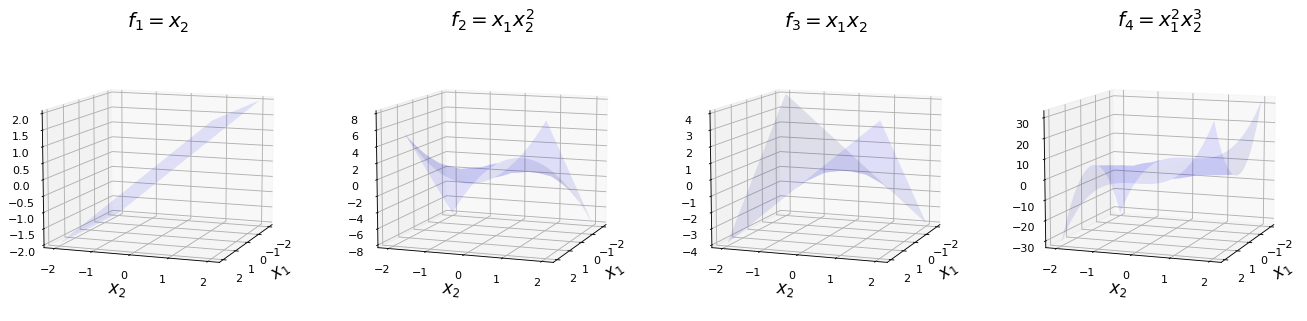

In [4]:
# plot the first few 3d polynomials
baslib.basics_plotter.poly_3d_plotter()

In general we can make polynomials taking in $N$ (e.g., $N=10$) inputs $x_1,\,x_2,\,...\,x_N$  by following the same pattern we saw for two inputs.  That is, we pick a set of $N$ nonnegative integers like $(2,10,1,...,23,14)$, raise the each input variable to its corresponding number - for example $x_1^2$, $x_2^{10}$, $x_3^{1}$,...,$x_{N-1}^{23}$, $x_N^{14}$ - and multiply these terms together forming the polynomial element $f(x_1,x_2,...,x_{N-1},x_N) = x_1^{2} x_2^{10} x_3^1 \cdots x_{N-1}^{23}x_N^{14}$

### Reciprocal functions

Reciprocal functions look quite similar to polynomials - instead of raising an input to a positive integer, we raise them to a negative one. The first three such functions look like 

\begin{equation}
f_1(x) = x^{-1} = \frac{1}{x}\,\,, ~~ f_2(x) = x^{-2} = \frac{1}{x^2}\,\,,~~ f_3(x)=x^{-3} = \frac{1}{x^3}\,\,
\end{equation}

In general, raising an input to the power $n$ means $x^{-n} = \frac{1}{x^n}$  Several examples of reciprocal functions are plotted by the Python cell below.

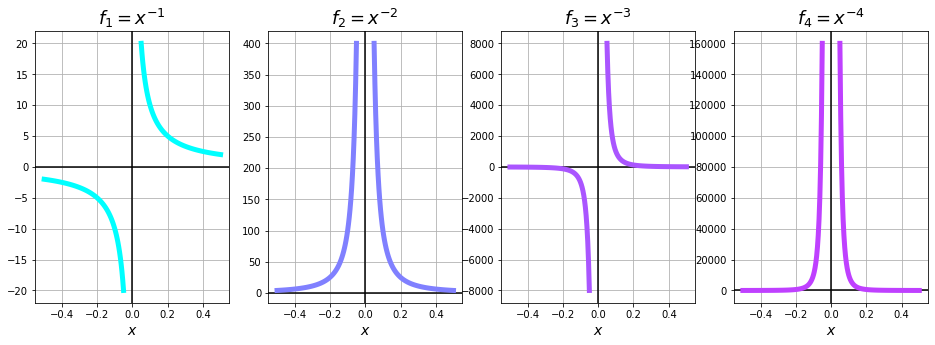

In [5]:
# plot first few reciprocal functions
baslib.basics_plotter.recip_plotter()

#### <span style="color:#a50e3e;">Example. </span>  Ohm's law

Ohm’s law, proposed by the German physicist Georg Simon Ohm following a series of experiments made by him in the 1820s, connects the magnitude of the current in a galvanic circuit to the sum of all the exciting forces in the circuit, as well as the length of the circuit. Although he did not publish any account of his experimental results, it is easy to verify his law using a simple experimental setup, shown in the left panel below, that is very similar to what he then utilized. This image is taken from <a target="_blank" href="https://github.com/jermwatt/machine_learning_refined">Machine Learning Refined</a>. The spirit lamp heats up the circuit, generating an electromotive force which creates a current in the coil deflecting the needle of the compass. The tangent of the deflection angle is directly proportional to the magnitude of the current passing through the circuit. The magnitude of this current is inversely proportionally to the length of the wire used to close the circuit (dashed curve). In the right panel below we show the readings of the current (in terms of the tangent of the deflection angle) for 5 different lengths (in cm) of the closing wire.

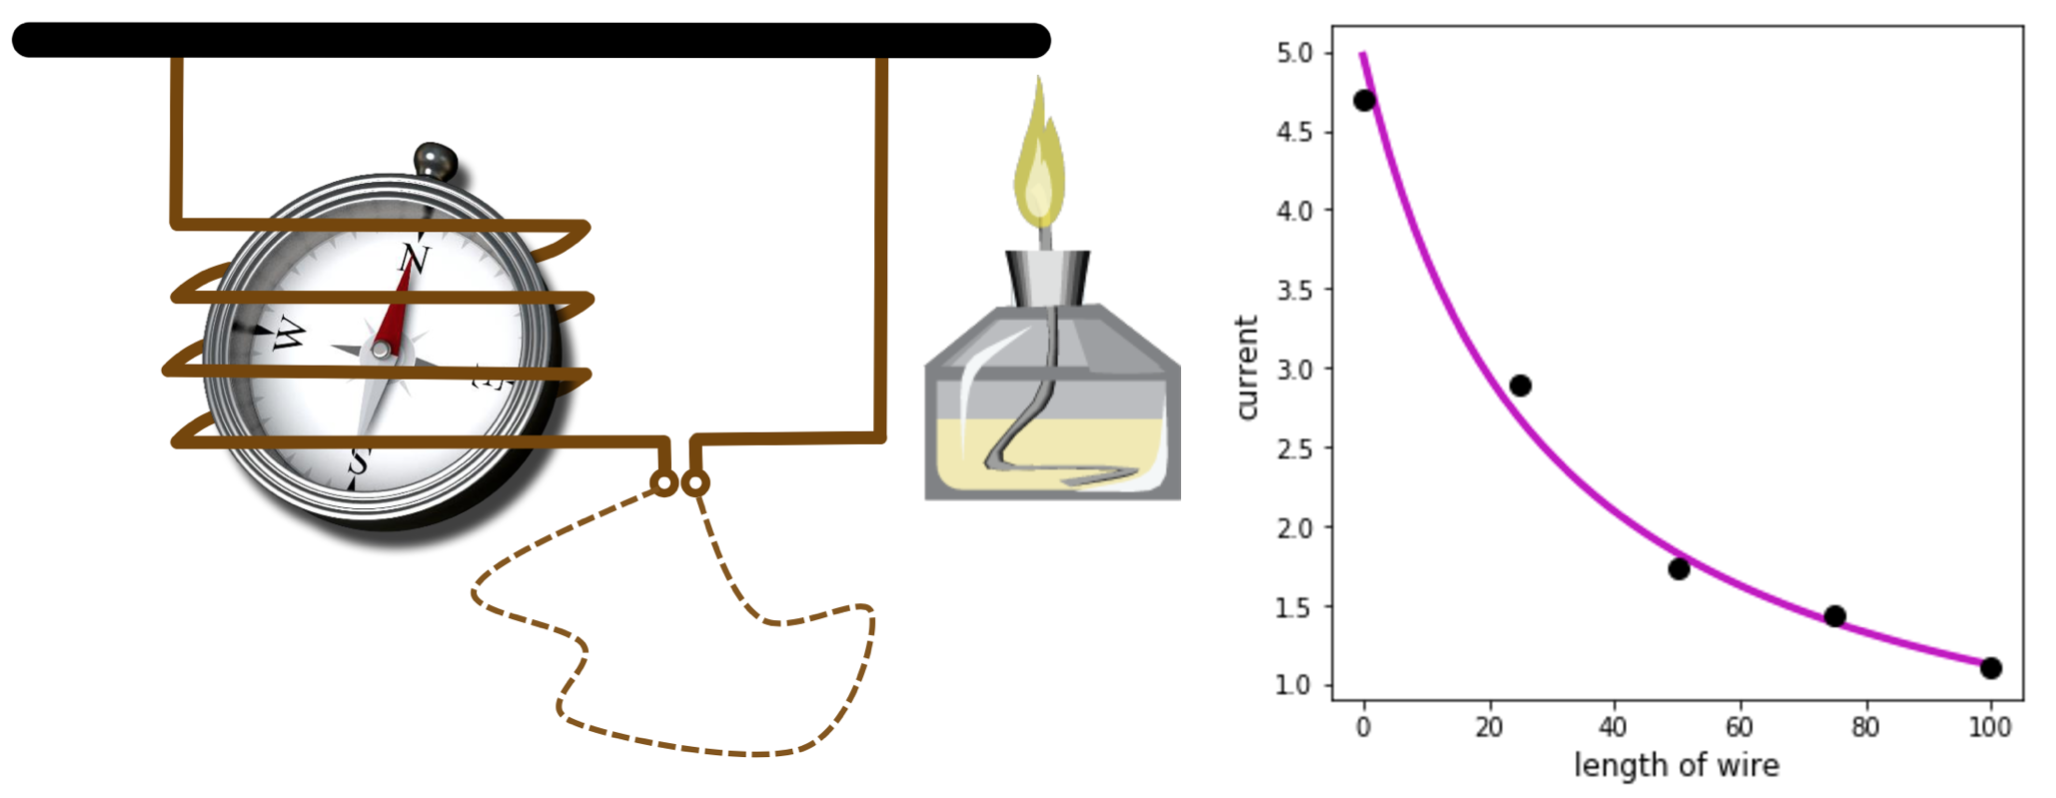

In [9]:
Image(filename = "compmaths_images/ohms.png", width=800, height=300)

## 1.2  Trigonometric and hyperbolic functions

The basic trigonometric elementary functions are derived from the simple relations of a right triangle, and take on a wavy and repeating (or *periodic*) shape.  The first of these are the *sine* and *cosine* functions.  These two functions that originate in tracking the width and height of single point on a unit circle

\begin{equation}
x^2 + y^2 = 1
\end{equation}

as it smoothly moves  counterclockwise around - as illustrated in the animation shown by the following Python cell.  Here the point on the unit circle is pointed too using an arrow stemming from the origin.

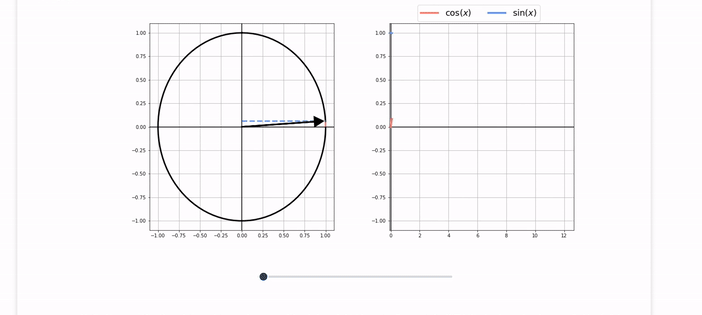

In [13]:
Image(filename = "demo_images/sine_cosine_unit_circle.gif", width=900, height=400)

Notice how every time the point completes one loop around the circle each function naturally repeats itself.  This is why sine and cosine are called 'periodic' - they repeat every 360 degrees, or $2\pi$ radians (or $\tau$ radians [more properly](https://tauday.com/).  We write cosine and sine algebraically as [cite]

\begin{array}\
f(x) = \text{cos}(x) \\
f(x) = \text{sin}(x) \\
\end{array}

#### <span style="color:#a50e3e;">Example. </span>  Our periodic universe

Sine and cosine have been used for some time to model the movements of celestial bodies - like the way the planets revolve around the Sun, or their moon(s) revolve around them.  For example, playing with the slider widget above, you can imagine in the left panel representing the Earth and its moon in 2-dimensions.  The circle's center represents the Earth, and the point indicated by the arrow on the circle's circumference indicating the position of the moon.  As you move the slider from left to right the moon revolves around the Earth, and in the right panel - plotted as the sine and cosine waves - are the horizontal and vertical distances of the moon traced out as it revolves.

----


Other common trigonometric functions are based on various ratios of these two fundamental functions.  For example 'arctangent' is simply the ratio of sine to cosine

$$ f(x) = \text{tan}(x) = \frac{\text{sin}(x)}{\text{cos}(x)}$$

and is plotted in the next Python cell over a range of its input values.

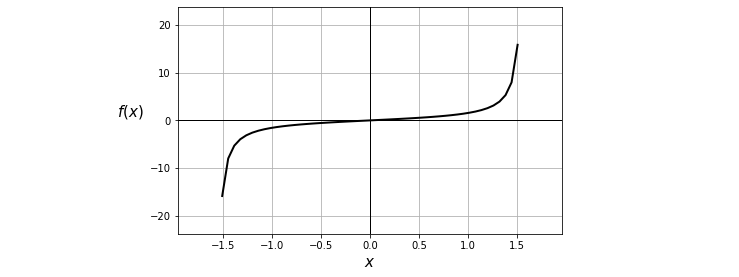

In [14]:
# create function
x = np.linspace(-np.pi*0.48,np.pi*0.48)
f = np.tan(x)

# reshape and package for plotter
x.shape = (len(x),1)
f.shape = (len(f),1)
f_table = np.concatenate((x,f),axis=1)

# use custom plotter to plot function table of values
baslib.basics_plotter.single_plot(table = f_table,xlabel = '$x$',ylabel = '$f(x)$',rotate_ylabel = 0)

Sine/cosine wave functions for two inputs - $x_1$ and $x_2$ -  involve creating wave elements in each variable individually, and multiplying the result - like so.

\begin{array}\
f(x_1,x_2) = \text{sin}(x_1)\text{sin}(x_2)\\
f(x_1,x_2) = \text{cos}(x_1)\text{cos}(x_2)\\
\end{array}

with a similar pattern holding for general $N$ dimensional input as well.

In the next Python cell we plot the two functions above over a fine grid of input values.

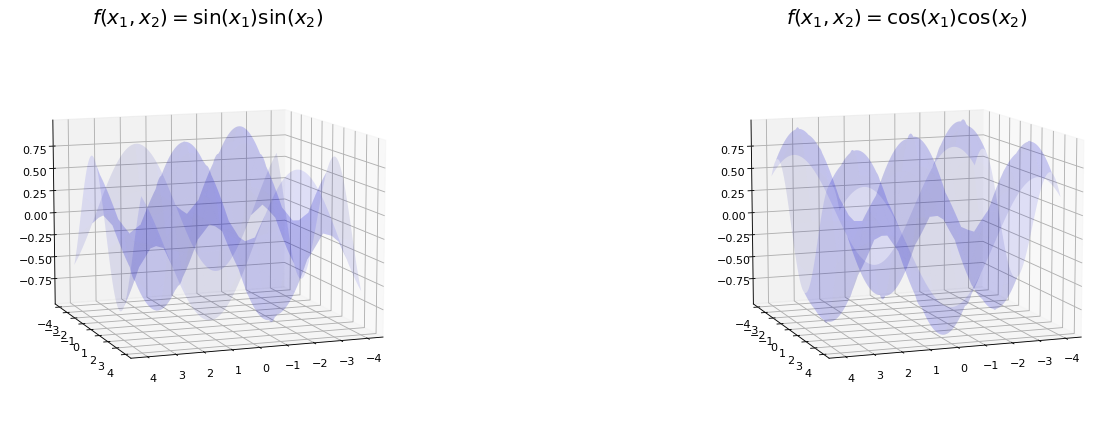

In [15]:
# generate input values
s = np.linspace(-4,4,200)
x_1,x_2 = np.meshgrid(s,s)

# build 4 polynomial basis elements
fig = plt.figure(num=None, figsize = (16,5), dpi=80, facecolor='w', edgecolor='k')

### plot regression surface ###
f = np.sin(x_1)*np.sin(x_2)
ax1 = plt.subplot(1,2,1,projection = '3d')
ax1.plot_surface(x_1,x_2,f,alpha = 0.1,color = 'b',zorder = 0,shade = True,linewidth=0.5,antialiased = True,cstride = 20, rstride = 15)
ax1.view_init(10,70)
ax1.set_title('$f(x_1,x_2)=\sin(x_1)\sin(x_2)$',fontsize = 18)

f = np.cos(x_1)*np.cos(x_2)
ax2 = plt.subplot(1,2,2,projection = '3d')
ax2.plot_surface(x_1,x_2,f,alpha = 0.1,color = 'b',zorder = 0,shade = True,linewidth=0.5,antialiased = True,cstride = 20, rstride = 15)
ax2.view_init(10,70)
ax2.set_title('$f(x_1,x_2)=\cos(x_1)\cos(x_2)$',fontsize = 18)

fig.subplots_adjust(left=0,right=1,bottom=0,top=1)   # remove whitespace around 3d figure

plt.show()

In analogy to trigonometric functions, the basic hyperbolic functions - called hyperbolic sine and cosine - arise as the height and width of a point tracing out the unit hyperbola given by 

\begin{equation}
x^2 - y^2 = 1
\end{equation}

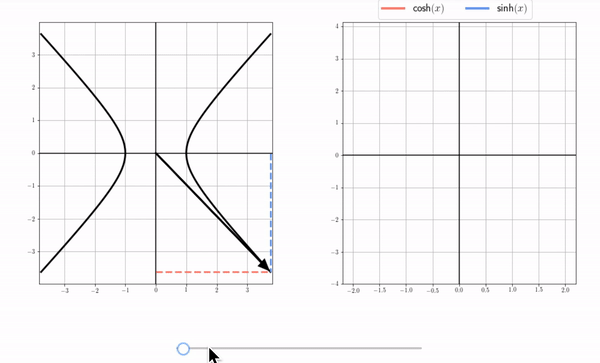

In [17]:
Image(filename = "demo_images/hyper.gif", width=900, height=400)

We write the hyperbolic cosine and and sine (or cosh and sinh for short) algebraically as 

\begin{array}\
f(x) = \text{cosh}(x) \\
f(x) = \text{sinh}(x) \\
\end{array}

Other common trigonometric functions are based on various ratios of these two fundamental functions.  For example the *hyperbolic tangent* (or tanh for short) is simply the ratio of sinh to cosh

$$ f(x) = \text{tanh}(x) = \frac{\text{sinh}(x)}{\text{cosh}(x)}$$

and is plotted in the next Python cell.

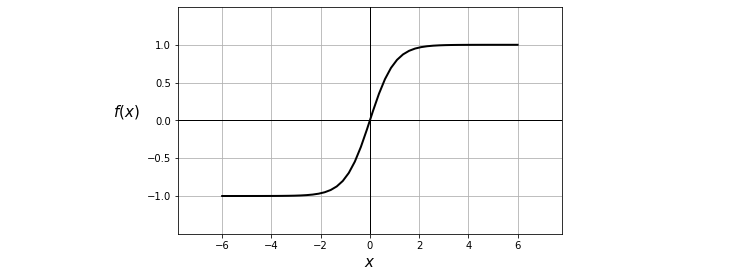

In [18]:
# create function
x = np.linspace(-6,6)
f = np.tanh(x)

# reshape and package for plotter
x.shape = (len(x),1)
f.shape = (len(f),1)
f_table = np.concatenate((x,f),axis=1)

# use custom plotter to plot function table of values
baslib.basics_plotter.single_plot(table = f_table,xlabel = '$x$',ylabel = '$f(x)$',rotate_ylabel = 0)

As in the previous cases, to generalize to higher dimensional input we can simply transform each coordinate variable and multiply the result.  For example for two inputs

$$
f(x_1,x_2) = \text{tanh}(x_1)\text{tanh}(x_2)
$$

And this sort of pattern holds for all of the elementary function examples that follow as well.

## 1.3  Exponential and log functions

Have you ever heard the story about the clever teenager that made the following deal with her parents?  Instead of paying her \$10 a week to perform her chores, she offered the following replacement payment plan: staring the next day she is paid \$0.01 cent, the next day \$0.02 cents, the next \$0.04 cents, and so on with each day's payment double the previous one's.  The parents - blinded by the immediate prospect of paying only a few pennies the first week instead of $10 - immediately jumped at the offer.  The child having duped her foolish parents rubbed her hands together greedily - knowing that her days of toil for her parents would soon end.  Why?  Because she knew that her new daily stipend - a pittance in the beginning for sure - would soon grow into colossal daily take-in, growing *exponentially* larger every day.

On the first day she receives one cent, then the second day's payment doubles that to $2$ cents, on the third we double again giving $2\cdot 2 = 2^2$ cents, the fourth day gives $2\cdot 2^2 = 2^3$ cents, and so on.  Following this pattern we can tally a day's income by simply raising $2$ to the number of days since the start of the deal minus 1.  In short - this means that after one month - on the $30^{th}$ day - she receives $2^{29}$ cents.  How much is that worth?  Well $2^{29} = 53,687,0912$ cents, or $5,368,709.12$ dollars.  Not too bad for a day's work.

Her trick used an *exponential function* - more formally defined as

$$
f(x) = 2^x
$$

for any value $x$.  This function is plotted by the next Python cell.

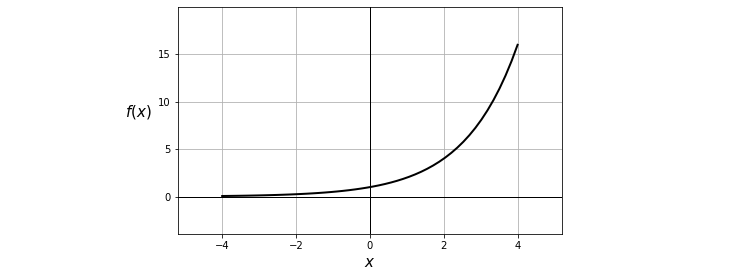

In [19]:
# create function
x = np.linspace(-4,4)
f = 2**x

# reshape and package for plotter
x.shape = (len(x),1)
f.shape = (len(f),1)
f_table = np.concatenate((x,f),axis=1)

# use custom plotter to plot function table of values
baslib.basics_plotter.single_plot(table = f_table,xlabel = '$x$',ylabel = '$f(x)$',rotate_ylabel = 0)

More generally an exponential can be defined for any *base* value - not just 2 as we have just seen.  For example, an exponential with base 10 is given as 

$$ 
f(x) = 10^x
$$

Another very popular choice for base is the - perhaps strange at first sight - so-called 'Euler' value denoted $e= 2.71828...$ where the decimal expansion is non-repeating (see endnote [[1]](#endnotes) for a short history on how this constant originated).  The exponential with base $e$ - written as 

$$
f(x) = e^x
$$

arises in a wide range of contexts, with some important cases in machine learning (as we will see).

#### <span style="color:#a50e3e;">Example. </span>  Moore's law

Gordon Moore, co-founder of Intel corporation, predicted in a [1965 paper](http://www.cs.utexas.edu/~fussell/courses/cs352h/papers/moore.pdf) that the number of transistors on an integrated circuit would double approximately every two years - in other words, that this trend is exponential. This conjecture, referred to nowadays as the Moore’s law, has proven to be sufficiently accurate over the past 5 decades. Since the processing power of computers is directly related to the number of transistors in their CPUs, Moore’s law provides a trend model to predict the computing power of future microprocessors. The plot below - taken from <a target="_blank" href="https://github.com/jermwatt/machine_learning_refined">Machine Learning Refined</a> - shows the transistor counts of several microprocessors versus the year they were released, starting from Intel 4004 in 1971 with only 2300 transistors, to Intel’s Xeon E7 introduced in 2014 with more than 4.3 billion transistors along with an appropriate exponential model. 

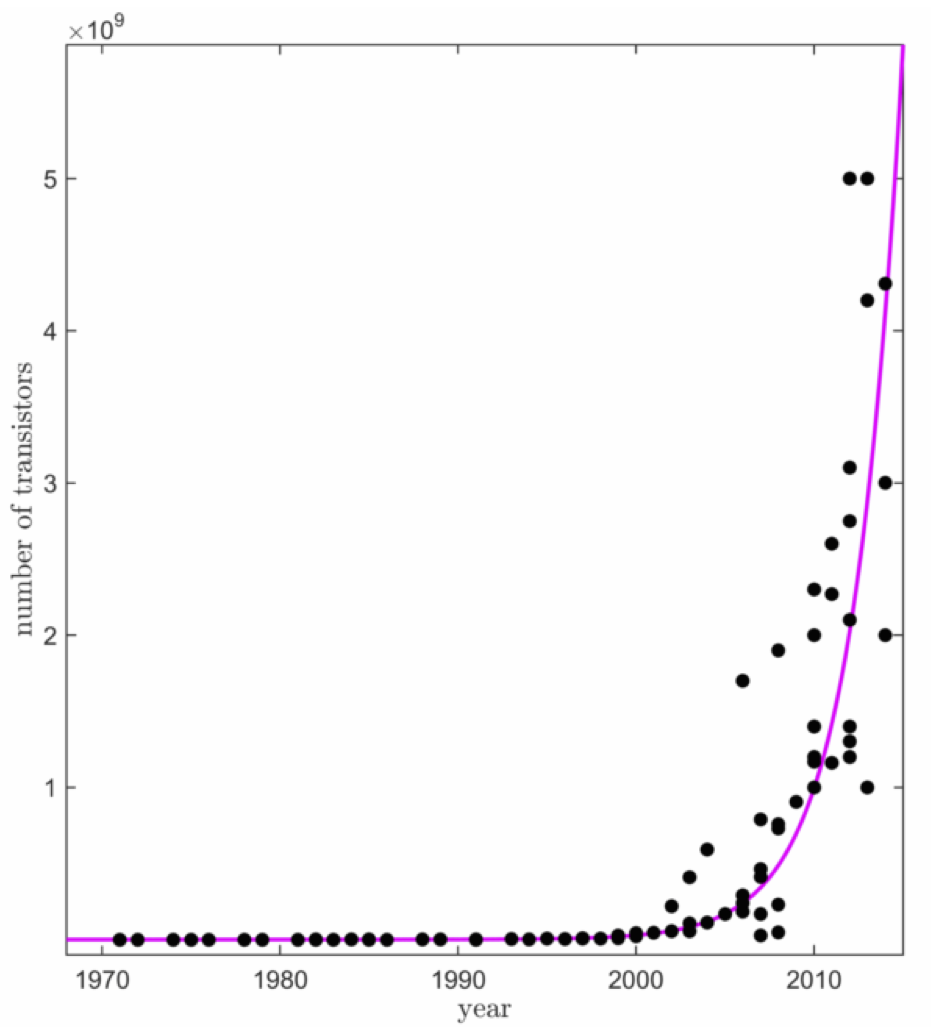

In [21]:
Image(filename = "compmaths_images/Moores_law.png", width=500, height=300)

#### <span style="color:#a50e3e;">Example. </span>  Expressing the hyperbolic tangent in terms of exponentials

Here we see one interesting way the exponential of base $e$ arises - as a way to express the hyperbolic tangent function $f(x) = \text{tanh}(x)$ we saw above.  This decomposition is 

\begin{equation}
\text{tanh}(x) = \frac{e^{x} - e^{-x}}{e^{x} + e^{-x}}
\end{equation}

One could build a similar appearing function using exponentials of any base, for the exact definition of tanh given above one must use the particular base $e$ (which one can show using [Euler’s formula](https://en.wikipedia.org/wiki/Euler%27s_formula).

The following Python cell plots out this exponential form of $\text{tanh}$ - which you can see matches the original plot exactly.

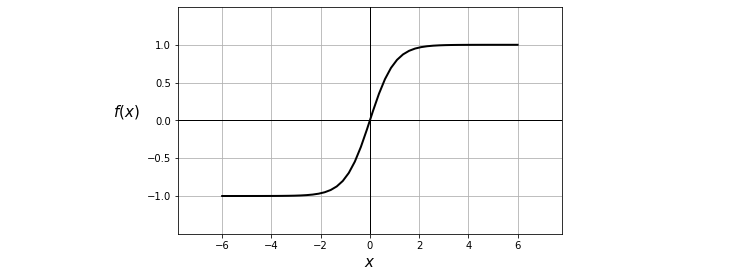

In [22]:
# create function
x = np.linspace(-6,6)
f = (np.exp(x) - np.exp(-x))/(np.exp(x) + np.exp(-x))

# reshape and package for plotter
x.shape = (len(x),1)
f.shape = (len(f),1)
f_table = np.concatenate((x,f),axis=1)

# use custom plotter to plot function table of values
baslib.basics_plotter.single_plot(table = f_table,xlabel = '$x$',ylabel = '$f(x)$',rotate_ylabel = 0)

## The logarithm

Many of us are tormented in grade school to memorize simple multiplication tables, so that we can quickly compute products like 10*9 = 90, 5*5 = 25, etc.,  But few of us are so tormented to learn how to efficiently compute products 10,023,583*438,323, either by wrote memorization or by hand.  Instead when the numbers being multiplied get too large we turn to a trusty calculator to lighten the load.  But before the advent of calculators (i.e., before the 1970s) one had no choice but to multiplying two large numbers by hand - an obviously tedious and time consuming task, requiring careful book keeping to avoid clerical errors.  Necessity being the mother of all invention however, people invented all sorts of tricks to try to make computations like these easier.

The *logarithm* is a trusty elementary function which - first invented to cut big multiplication problems down to size by *turning multiplication into addition* - has a wide range of modern applications.  Based on the exponential function with generic base $a$, the logarithm of base $a$ is defined as

\begin{equation}
y = \text{log}_a(x) \iff a^y = x
\end{equation}

And using this definition one can quickly check (see endnote [[2]](#endnotes)) that indeed this function - regardless of the choice of base $a$ - turns multiplication into addition i.e.,

\begin{equation}
\text{log}_a(p \cdot q) = \text{log}_a(p) + \text{log}_a(q)
\end{equation}

the logarithm and exponential with base $a$ are *inverses* of one another.  That is for any value $x$ it is true that $\text{log}_a(a^x) = x$ and $a^{\text{log}_a(x)} = x$.

This allowed one to take the multiplication of two large numbers $p$ and $q$ and instead of doing this multiplication, evaluating $p$ and $q$ by the logarithm (usually looking up the values $\text{log}_a(p)$ and $\text{log}_a(q)$ values in a table), adding the result, and then exponentiating to get the resulting product $p \cdot q$.

The logarithm with base $e$ - referred to as the *natural logarithm* - is plotted by the following Python cell.

Exception ignored in: <function FileMovieWriter.__del__ at 0x7fdbc31e7ee0>
Traceback (most recent call last):
  File "/usr/local/lib/python3.8/dist-packages/matplotlib/animation.py", line 442, in __del__
    if self._tmpdir:
AttributeError: 'HTMLWriter' object has no attribute '_tmpdir'


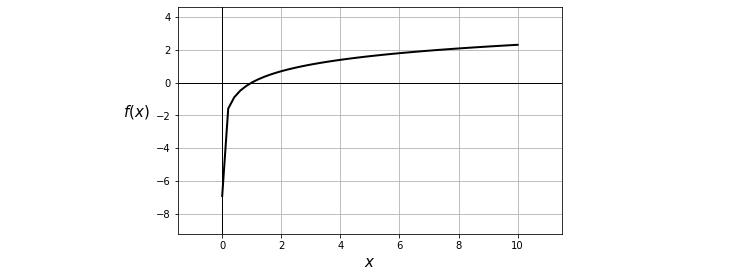

In [23]:
# create function
x = np.linspace(0.001,10)
f = np.log(x)

# reshape and package for plotter
x.shape = (len(x),1)
f.shape = (len(f),1)
f_table = np.concatenate((x,f),axis=1)

# use custom plotter to plot function table of values
baslib.basics_plotter.single_plot(table = f_table,xlabel = '$x$',ylabel = '$f(x)$',rotate_ylabel = 0)

## 1.4  Step functions

Compared with the previous functions, *step functions* may seem like an odd bird at first but they pop up all over the place.  Instead of being defined by a single equation over their entire input, they are defined in cases over subregions of their input.  Over each subregion the functions are constant, but can take on different values on each subregion.  For example, a step function with *two steps* has the algebraic form 

\begin{equation}
f(x) = \begin{cases}
v_1 \,\,\, \text{if}\,\,\, x < s\\
v_2 \,\,\, \text{if}\,\,\, x \geq s\\
\end{cases}
\end{equation}

where $s$ is referred to as a *split point*, and $v_1$ and $v_2$ are two constant values.  

#### <span style="color:#a50e3e;">Example. </span>  Sign function

The $\text{sign}$ function is a prime and often used example of a step function with two steps, taking the form 

\begin{equation}
f(x) = \begin{cases}
-1 \,\,\, \text{if}\,\,\, x < 0\\
+1 \,\,\, \text{if}\,\,\, x \geq 0\\
\end{cases}
\end{equation}

i.e. it simply produces the algebraic sign of its input.  This function is plotted by the next Python cell.

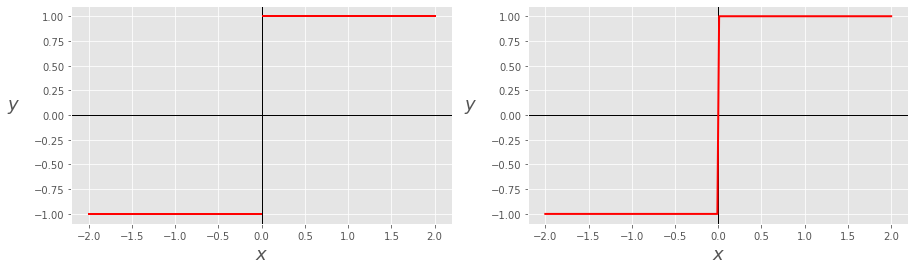

In [24]:
# create function
x = np.linspace(-2,2,200)
f = np.sign(x)

# reshape and package for plotter
x.shape = (len(x),1)
f.shape = (len(f),1)
f_table = np.concatenate((x,f),axis=1)

# use custom plotter to plot function table of values
baslib.basics_plotter.step_plot(table1 = f_table, table2 = f_table,xlabel = '$x$',ylabel_1 = '$y$',ylabel_2 = '$y$',fontsize = 18)

In the left panel above we plot the function as it truly looks - it is *discontinuous* with a visible gap at zero from -1 to +1.  In the left panel we show a more common way of plotting such a function, where this discontinuity has been filled in to be more pleasing to the eye.

----

A step function with three steps breaks the input into three subregions, taking on a different value over each subregion

\begin{equation}
f(x) = \begin{cases}
v_1 \,\,\, \text{if}\,\,\, x < s_1\\
v_2 \,\,\, \text{if}\,\,\, s_1 < x < s_2\\
v_3 \,\,\, \text{if}\,\,\, s_2 < x\\
\end{cases}
\end{equation}  

and so has 2 split points $s_1$ and $s_2$, with three levels denoted $v_1$, $v_2$, and $v_3$ respectively.  

A general step function with $N$ steps is defined similarly - in the next Python cell we plot such a step function with five steps.

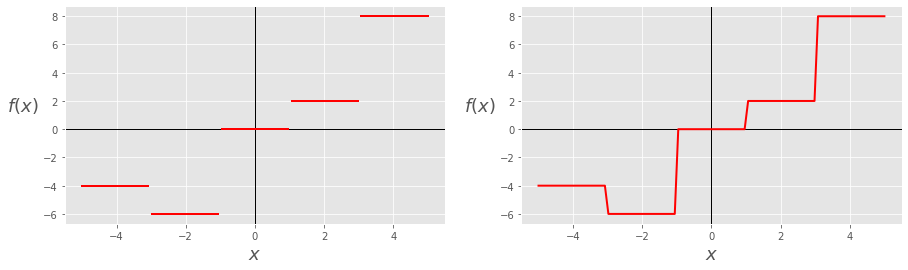

In [25]:
# define input
x = np.linspace(-5,5,100)
step_vals = []
y = []
for n in range(5):
    n = np.random.randint(20) - 10
    y.append((n*np.ones(20)).tolist())
y=np.asarray(y).flatten()

# reshape and package for plotter
x.shape = (len(x),1)
y.shape = (len(y),1)
f_table = np.concatenate((x,y),axis=1)

# use custom plotter to plot function table of values
baslib.basics_plotter.step_plot(table1 = f_table, table2 = f_table,xlabel = '$x$',ylabel_1 = '$f(x)$',ylabel_2 = '$f(x)$',fontsize = 18)

Once again in the left panel we plot the true function - with its many discontinuities and steps plainly visible.  In the right panel we plot the step function in a more common manner - visibly filling in all of its discontinuities. 

#### <span style="color:#a50e3e;">Example. </span>  Digital compression

A common place to see step functions - every day digital life.  Many analog (continuous) signals like radio and television often look like some sort of sinusoid when broadcast.  However an electronic device will digitize or 'quantize' such signals in order to more efficiently store and process them.  This entails transforming the original wavy analog signal into a step function that closely resembles it.  Then - going forward - far fewer values are required (just the values of the steps and splitting points, as opposed to the entire original function).

The next Python cell plots a facsimile of this idea for a simple sinusoid.  In the left panel we show the original function in blue, along with the digitized step function version in red.  The right panel shows the same picture, only with the digitized function fully connected for visualization purposes only. 

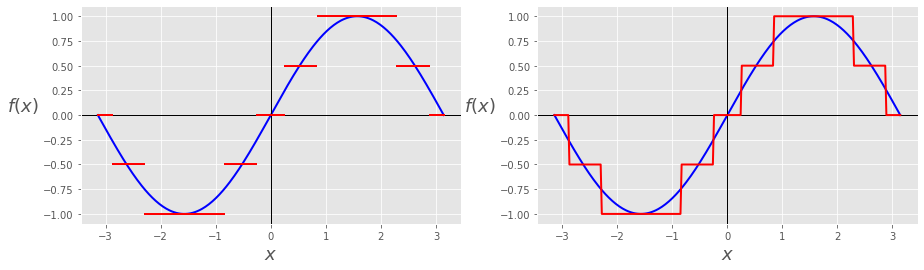

In [26]:
# create original and quantized function
x = np.linspace(-np.pi,np.pi,300)
t = np.sin(x)
v = np.linspace(min(t),max(t),5)
f = []
for b in t:
    ind = np.argmin(abs(b-v))
    f.append(v[ind])
f = np.asarray(f)
    
# reshape and package for plotter
x.shape = (len(x),1)
f.shape = (len(f),1)
t.shape = (len(t),1)
f_table = np.concatenate((x,f),axis=1)
forig_table = np.concatenate((x,t),axis=1)
baslib.basics_plotter.step_plot(table1 = f_table, table2 = f_table,table_3 = forig_table,xlabel = '$x$',ylabel_1 = '$f(x)$',ylabel_2 = '$f(x)$',fontsize = 18)

# 2.  Basic arithmetic with functions

In this Section we discuss a number of ways to adjust the elementary functions introduced in the previous Section and how - using a variety of operations - one can combine elementary functions together to produce new functions of infinite variation. 

## 2.1  Basic adjustments

### Amplification and attenuation

Multiplying a function $f(x)$ by a scalar weight $w$ results in a new function $w\cdot f(x)$ that is an amplified version of the original $f(x)$ when $w>1$. This is essentially what an electronic amplifier does to its input signal. When $0<w<1$ on the other hand, the resulting function would be an attenuated version of $f(x)$. One can easily verify that in the special case where $w=-1$, the result is simply the reflection of $f(x)$ over the horizontal axis.   

The next python cell plots the following three functions to exemplify the concept of multiplying a function by a scalar: 

\begin{array}\
f_1(x)=\text{sin}(x) \\
f_2(x)=4f_1(x) \\
f_3(x)=-f_1(x) \\
\end{array}

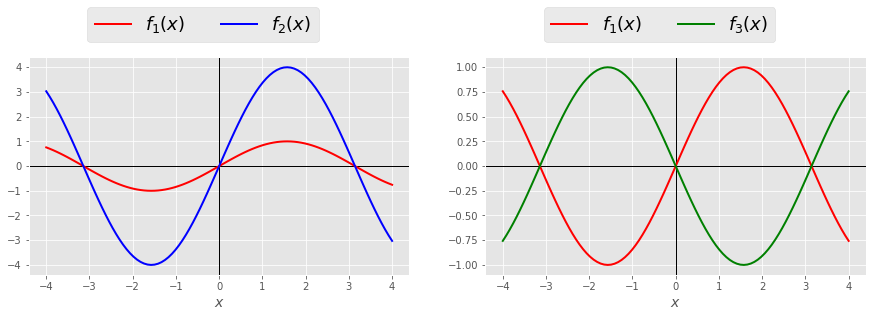

In [27]:
# create functions
x = np.linspace(-4,4,100)
f1 = np.sin(x)
f2 = 4*f1
f3 = -f1 

# plot all
baslib.basics_plotter.triple_plot_in_two(func_in = x, f1 = f1, f2 = f2, f3 = f1, f4 = f3, legend1=['$f_1(x)$','$f_2(x)$'], legend2=['$f_1(x)$','$f_3(x)$'],axes = True)

### Vertical and horizontal shifts

Adding a scalar weight $w$ to the function $f(x)$ simply elevates its plot by $w$ units - along the vertical axis. Adding $w$ to the input $x$ on the other hand causes $f(x)$ to move along the horizontal axis. Specifically, the plot $f(x+w)$ is drawn when that of $f(x)$ is shifted $w$ units to the left.  

The next python cell plots the following three functions to illustrate this idea: 

\begin{array}\
f_1(x)=\text{sin}(x) \\
f_2(x)=f_1(x)+1 \\
f_3(x)=f_1(x+1) \\
\end{array}

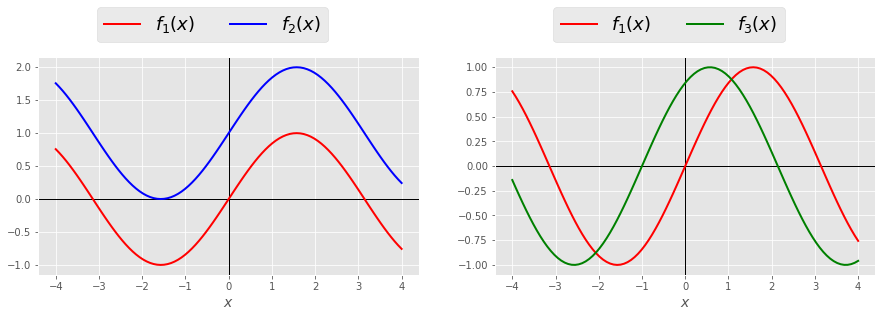

In [28]:
# create functions
x = np.linspace(-4,4,100)
f1 = np.sin(x)
f2 = f1 + 1
f3 = np.sin(x+1)

# plot all
baslib.basics_plotter.triple_plot_in_two(func_in = x, f1 = f1, f2 = f2, f3 = f1, f4 = f3, legend1=['$f_1(x)$','$f_2(x)$'], legend2=['$f_1(x)$','$f_3(x)$'],axes = True)

### Shrinking and stretching

Multiplying the input to $f(x)$ by a scalar weight $w$ results in a new function $f(wx)$ that is a shrunk version (along the horizontal axis) of the original $f(x)$ when $w>1$. When $0<w<1$ on the other hand, the resulting function would be a stretched version of $f(x)$. One can easily verify that in the special case where $w=-1$, the result is simply the reflection of $f(x)$ over the vertical axis.   

The next python cell plots the following three functions to exemplify the idea of shrinking and stretching a function by attaching a weight to its input: 

\begin{array}\
f_1(x)=\text{tanh}(x) \\
f_2(x)=f_1(4x) \\
f_3(x)=f_1(\frac{1}{4}x) \\
\end{array}

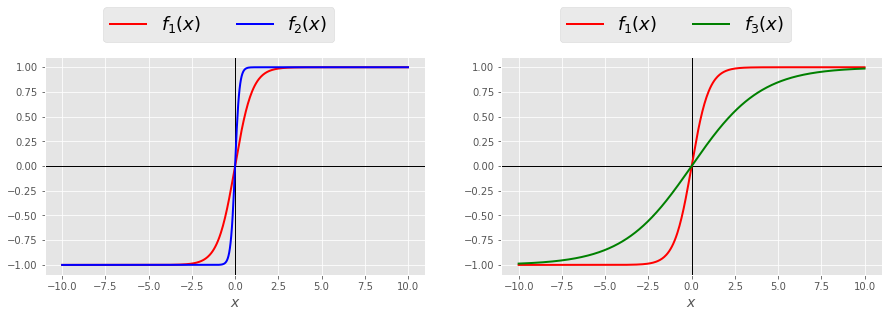

In [29]:
# create functions
x = np.linspace(-10,10,500)
f1 = np.tanh(x)
f2 = np.tanh(4*x)
f3 = np.tanh(.25*x)

# plot all
baslib.basics_plotter.triple_plot_in_two(func_in = x, f1 = f1, f2 = f2, f3 = f1, f4 = f3, legend1=['$f_1(x)$','$f_2(x)$'], legend2=['$f_1(x)$','$f_3(x)$'],axes = True)

#### <span style="color:#a50e3e;">Example. </span>  Modeling population growth

In the early 19th century, Belgian mathematician Pierre François Verhulst designed the logistic sigmoid function illustrated in the python cell below and defined mathematically as

$$\sigma\left(x\right)=\frac{1}{1+e^{-x}}$$

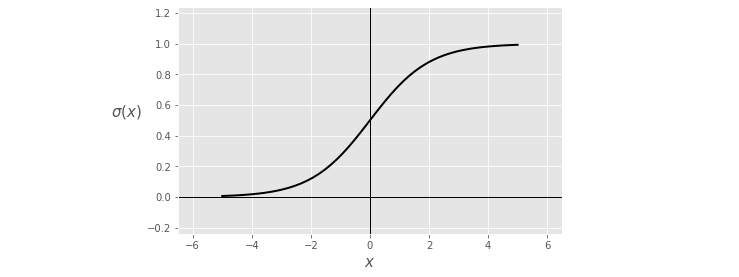

In [30]:
# create function
x = np.linspace(-5,5)
f = 1/(1+np.exp(-x))

# reshape and package for plotter
x.shape = (len(x),1)
f.shape = (len(f),1)
f_table = np.concatenate((x,f),axis=1)

# use custom plotter to plot function table of values
baslib.basics_plotter.single_plot(table = f_table,xlabel = '$x$',ylabel = '$\sigma(x)$',rotate_ylabel = 0)

Did you notice the striking similarity between the sigmoid function $\sigma(x)$ and the hyperbolic tangent function $\text{tanh}(x)$? They are indeed very cosely related. With a little algebra you can easily show that 

$$\text{tanh}(x)=2\sigma(2x)-1$$

or alternatively

$$\sigma(x)=\frac{1}{2}+\frac{1}{2}\text{tanh}(\frac{x}{2})$$


This means that one function can be derived from the other using the simple adjustments we discussed in section. Note that unlike tanh that is bounded between $-1$ and $1$, the logistic sigmoid function is always positive and bounded between $0$ and $1$.

Verhulst designed the logistic sigmoid function in his pursuit of modeling how a population (of microbes, animal species, etc.) grows over time, taking into account the realistic assumption that regardless of the kind of organism under study the system in which it lives has only a finite amount of resources. Thus, as a result, there should be a strict cap on the total population in any biological system. According to Verhulst's model, the initial stages of growth should follow an exponential trend until a saturation level where, due to lack of required resources (e.g., space, food, etc.,), the growth stabilizes and levels off. Like any good mathematician Verhulst first phrased this ideal population growth model in terms of a differential equation (see endnote [[3]](#endnotes)), the solution to which is the logistic sigmoid function. 

The figure below - taken from <a target="_blank" href="http://mlrefined.com">Machine Learning Refined</a> - shows a real dataset consisting of nine data points corresponding to the normalized cell concentration (measured as the mass of organism per unit volume) of a particular bacteria, Lactobacillus delbrueckii, in spatially constrained laboratory conditions over the period of 24 hours. As you can see the organism's population over time follows a logistic sigmoid pattern. 

<p><img src="https://github.com/jermwatt/computational_maths/blob/master/compmaths_notebooks/compmaths_images/bacteria.png?raw=1" width="25%" height="auto"></p>

## 2.2 Addition and multiplication of functions

Just like numbers, basic arithmetic operations including addition/subtraction and multiplication/division can be used to combine two (or more) functions as well. For instance $f_1(x)+f_2(x)$ is a new function formed by adding the values of $f_1$ and $f_2$ at each point over their entire common domain.

The next python cell plots two sample functions

\begin{array}\
f_1(x)=2\text{sin}(x)+3\text{cos}(\frac{x}{10}-1) \\
f_2(x)=\text{sin}(10x) \\
\end{array}

along with their addition

$$f_3(x)=f_1(x)+f_2(x)$$

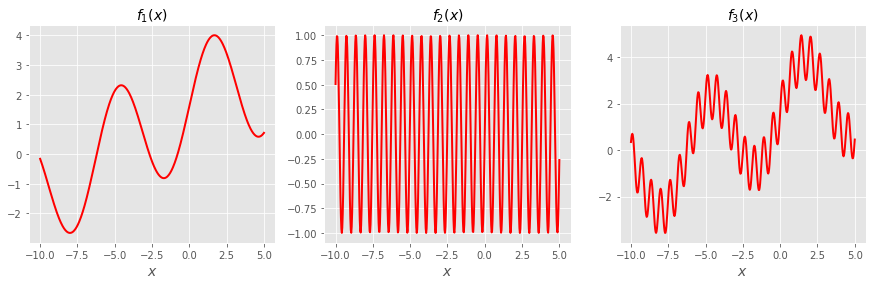

In [31]:
# create functions
x = np.linspace(-10,5,500)
f1 = 2*np.sin(x) + 3*np.cos(0.1*x-1)
f2 = np.sin(10*x)
f3 = f1 + f2 

# plot all
baslib.basics_plotter.triple_plot(func_in = x, f1 = f1, f2 = f2, f3 = f3,title1 = '$f_1(x)$',title2 = '$f_2(x)$',title3 = '$f_3(x)$',axes = False)

#### <span style="color:#a50e3e;">Example. </span>  The convex addition of two functions

The convex combination of two functions $f_1(x)$ and $f_2(x)$ is a special weighted sum of them taking the form

$$w\,f_1(x)+(1-w)\,f_2(x)$$

where $0\leq w \leq 1$. At the two extremes, i.e. when $w=0$ or $w=1$, the convex combination simply reduces to one of the the two original functions. For any other value of $w$ the convex combination is something in between whose shape becomes more similar to $f_1(x)$ when w is close to 1 and vice versa. 

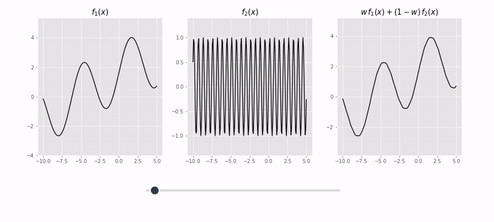

In [33]:
# # what function should we play with?  Defined in the next line. - this can only be run locally (not in collab)
# f1 = lambda x: 2*np.sin(x) + 3*np.cos(0.1*x-1)
# f2 = lambda x: np.sin(10*x)

# # create an instance of the visualizer with this function
# test = baslib.convex_function_addition_2d.visualizer()

# # plot away
# test.draw_it(g1 = f1, g2 = f2, num_frames = 50, min_range = -10, max_range = 5, title1='$f_1(x)$', title2='$f_2(x)$', title3='$w\,f_1(x)+(1-w)\,f_2(x)$')

Image(filename = "demo_images/convex_combination.gif", width=900, height=400)

Akin to addition, we can define multiplication of two functions $f_1(x)$ and $f_2(x)$ denoted by $f_1(x)\times f_2(x)$. You may find it interesting to know that Amplitude Modulation (AM) radio broadcasting was invented in the early 1900 based on the simple idea of multiplying a message signal by a sinusoidal function - called the carrier signal - at the transmitter side. Amplitude modulation makes it possible to broadcast multiple messages simultaneously over a shared medium. 

The next python cell plots the modulated signal 

$$f_3(x)= f_1(x)\times f_2(x)$$

constructed by multiplying the message signal $f_1(x)$ and the carrier signal $f_2(x)$.

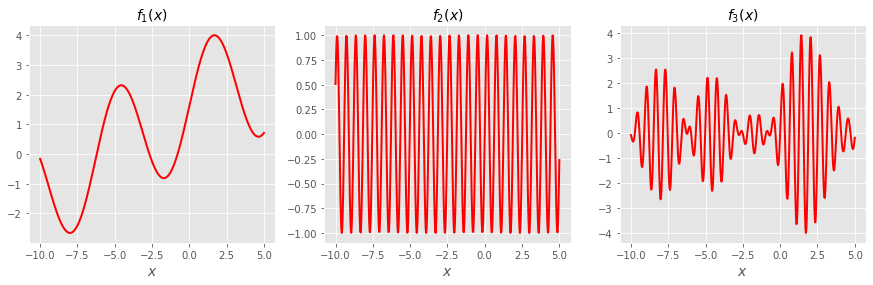

In [34]:
# create functions
x = np.linspace(-10,5,500)
f1 = 2*np.sin(x) + 3*np.cos(0.1*x-1)
f2 = np.sin(10*x)
f3 = f1*f2 

# plot all
baslib.basics_plotter.triple_plot(func_in = x, f1 = f1, f2 = f2, f3 = f3,title1 = '$f_1(x)$',title2 = '$f_2(x)$',title3 = '$f_3(x)$',axes = False)

## 2.3 Composition of functions

Another common way of combining two functions is by **composing** them. Simply speaking, this means that we take one function and plug it into the other.

Take functions $x^3$ and $\text{sin}(x)$ for example: we can plug $x^3$ into $\text{sin}(x)$ to get $\text{sin}\left(x^3\right)$, or alternatively, we can plug the sinusoidal function into the cubic one to get $\left(\textrm{sin}\left(x\right)\right)^{3}$. The Python cell below plots these functions.

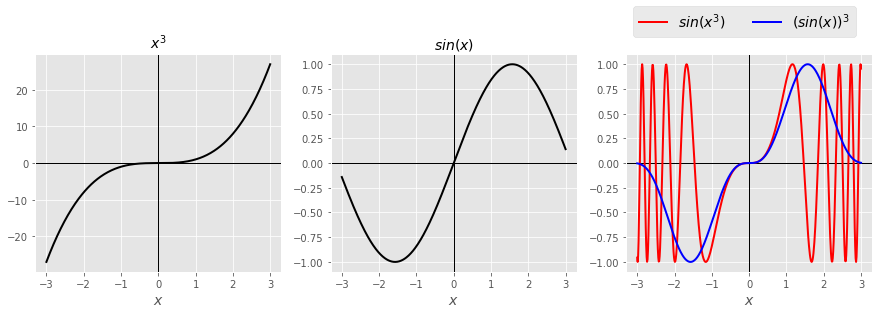

In [35]:
# print out the various ways of composing our 2 functions
baslib.basics_plotter.composition_demo1()

As you can see from this plot the order in which we compose the two functions is important. This is different from what we saw with addition/multiplication, where we always have

$$x^3+\text{sin}(x)=\text{sin}(x)+x^3\quad \text{and} \quad x^3\times \text{sin}(x)=\text{sin}(x)\times x^3$$ 

This gives composition, as a way of combining functions, much more flexibility compared to addition/multiplication, especially when dealing with more than two functions. Lets verify this observation by adding a third function to the mix: the exponential $e^x$. While again there is only one way to combine $x^3$, $\text{sin}(x)$, and $e^x$ via addition (i.e., $x^3+\text{sin}(x)+e^x$) or multiplication (i.e., $x^3\times \text{sin}(x)\times e^x$), we have now many different ways to compose these three functions: we can select any of the three, plug it into one of the two remaining functions, take the result and plug it into the last one.

The Python cell below plots the functions resulted from all $3!=3\times 2\times 1$ ways in which we can compose $x^3$, $\text{sin}(x)$, and $e^x$.    


Exception ignored in: <function FileMovieWriter.__del__ at 0x7fdbc31e7ee0>
Traceback (most recent call last):
  File "/usr/local/lib/python3.8/dist-packages/matplotlib/animation.py", line 442, in __del__
    if self._tmpdir:
AttributeError: 'HTMLWriter' object has no attribute '_tmpdir'


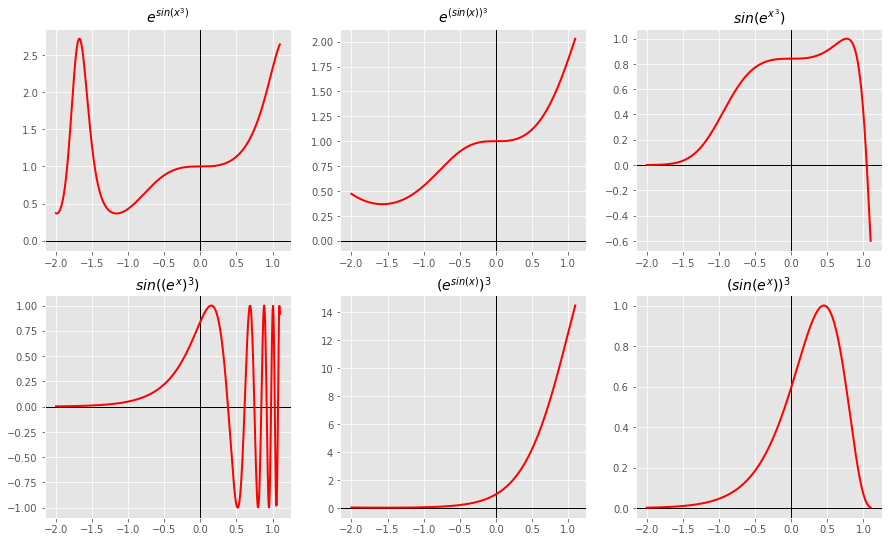

In [36]:
# plot all ways of composing our 3 functions
baslib.basics_plotter.composition_demo2()

Now that you are familiar with the idea of composition lets get mathematically rigorous and establish some notation for the composition of $f_1(x)$ and $f_2(x)$. Denoting $y$ as the output of the first function we have

$$y=f_1(x)$$

Visually, the equation $y=f_1(x)$ can be represented via a graphical model like this 

<p><img src="https://github.com/jermwatt/computational_maths/blob/master/compmaths_notebooks/compmaths_images/graph1.png?raw=1" width="20%" height="auto"></p>

This simple graphical model shows the function $f_1$ taking $x$ as input and returning $y$ as output. In other words, the input $x$ after passing through $f_1$ gets transformed into $y$. The direction of the arrow is important here as it indicates which variable is the input and which is the output: the arrow always points from the input toward the output.

Recall that with composition, $y$ should then be fed to the second function $f_2$ as input. Thus algebraically, we can write

$$z=f_2(y)$$

and visually, we can amend the graphical model to represent this new equation

<p><img src="https://github.com/jermwatt/computational_maths/blob/master/compmaths_notebooks/compmaths_images/graph2.png?raw=1" width="33%" height="auto"></p>

This new graphical model suggests that the final output $z$ is connected/related to $x$ (albeit indirectly through $y$), and hence we should be able to write it as a function of $x$

$$z=h(x)$$

To write $h$ in terms of $f_1$ and $f_2$, we plug $y=f_1(x)$ as the value for $y$ in $z=f_2(y)$ to get

$$z=f_2\left(y\right)=f_2\left(f_1\left(x\right)\right)$$

Comparing the last two equations we have

$$h(x)=f_2\left(f_1\left(x\right)\right)$$

which reads $h(x)$ is the composition of $f_2(x)$ with $f_1(x)$. The composition of $f_1(x)$ with $f_2(x)$ can be written similarly as $f_1\left(f_2\left(x\right)\right)$. Once again in general  


$$f_1\left(f_2\left(x\right)\right)\neq f_2\left(f_1\left(x\right)\right)$$


## 2.4 Max/min of functions

The maximum of two functions $f_1(x)$ and $f_2(x)$, denoted by

$$h(x)=\textrm{max}\left(f_{1}\left(x\right),f_{2}\left(x\right)\right)$$

is formed by setting $h(x)$ to the larger value of $f_1(x)$ and $f_2(x)$ for every $x$ in the common domain of $f_1$ and $f_2$. The minimum of two functions is defined in a similar manner, only this time by setting it to the smaller value of the two.  

#### <span style="color:#a50e3e;">Example. </span> Rectified linear unit and AC to DC conversion

Electricity is delivered to the point of consumption in AC (Alternating Current) mode, meaning that the voltage you get at your outlet is a sinusoidal waveform with both positive and negative cycles. This is while virtually every electronic device (mobile phone, laptop, etc.) operates on DC (Direct Current) power, and thus requires a constant steady supply of voltage. A conversion from AC to DC therefore has to take place inside the power adapter: this is the function of a rectifier. In its simplest form the rectifier comprises a single diode that blocks negative cycles of the AC waveform and only allows positive cycles to pass. The diode's output voltage $f_{\text{out}}$ can then be expressed in terms of the input voltage $f_{\text{in}}$ as

$$f_{\text{out}}(x)= \textrm{max}\left(0,f_{\text{in}}\left(x\right)\right)$$

The next python cell plots the shape of $f_{\text{out}}(x)$ when the input is a simple sinusoidal $f_{\text{in}}(x)=\text{sin}(x)$. 

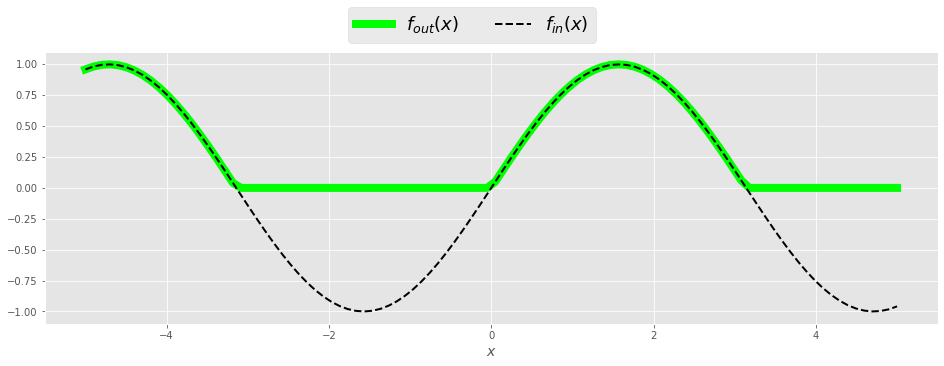

In [37]:
### plot the first four polynomials
# make a fine sampling of input values over the range [-5,5]
x = np.linspace(-5,5,100)
f1 = np.sin(x)
f2 = np.maximum(0,np.sin(x))

f1_table = np.stack((x,f1),axis = 1)
f2_table = np.stack((x,f2),axis = 1)

# plot the current element
fig = plt.figure(figsize = (16,5))
ax = fig.add_subplot(1,1,1)
ax.plot(f2_table[:,0],f2_table[:,1],color = 'lime',linewidth = 8,zorder = 3)
ax.plot(f1_table[:,0],f1_table[:,1],color = 'k',linestyle = '--',linewidth = 2,zorder = 3)

# clean up plot
ax.grid(True, which='both')
ax.set_xlabel('$x$',fontsize = 14)
ax.legend(['$f_{out}(x)$','$f_{in}(x)$'],loc='center left', bbox_to_anchor=(0.33, 1.1),fontsize=18,ncol=2)

plt.show()

When $f_{\text{in}}(x)=x$, the output 

$$f_{\text{out}}(x)= \textrm{max}\left(0,x\right)$$

is the so-called rectified linear unit - also known due to its shape as the ramp function - plotted in the next python cell.

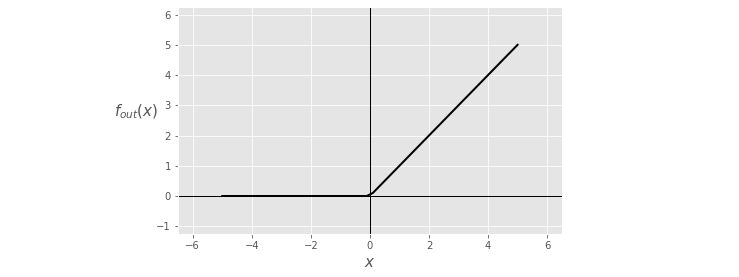

In [38]:
# create function
x = np.linspace(-5,5)
f = np.maximum(0,x)

# reshape and package for plotter
x.shape = (len(x),1)
f.shape = (len(f),1)
f_table = np.concatenate((x,f),axis=1)

# use custom plotter to plot function table of values
baslib.basics_plotter.single_plot(table = f_table,xlabel = '$x$',ylabel = '$f_{out}(x)$',rotate_ylabel = 0)

<a id='endnotes'></a>


## End notes

[1]  This popular value - credited to $17^{th}$ century mathematician Jacob Bernoulli - arose out of a thought experiment posed about compound interest payments.  The though experiment went like this. Suppose we have a principal of \$1.00 in the bank and receive 100% interest from the bank per year, credited once at the end of the year.  This means we would double our amount of money after a year, i.e., we multiply our principal by 2.  If instead of receiving one interest payment of 100% on our principal we received 2 payments of 50% interest during the year - notice what changes.  At the first crediting we multiply the principal by 1.5 (to get 50% interest), but the second crediting we multiply *this updated* value by 1.5.  Or - in other words - we multiply our principal by $(1.5)^2 = (1 + \frac{1}{2})^2$.  If we keep going in this way, supposing we credit 33.3333...% interest 3 times per year we end up multiplying the principal by $(1 + \frac{1}{3})^3$, cutting the interest in quarters we end up multiplying the principal by $(1 + \frac{1}{4})^4$, etc.,  So if we cut the interest payments into $n$ equal pieces we multiply the principal by $(1 + \frac{1}{n})^n$.  Its this quantity  - as n grows to infinity - that converges to the value $e = 2.71828...$.

$\,$

[2] To see how the logarithm turns multiplication into addition notice, if 

$$
y_1 = \text{log}_a(p) 
y_2 = \text{log}_a(q)
$$

then $y_1 + y_2 = \text{log}_a(p) + \text{log}_a(q)$.  But usig the definition of the logarithm given above this means that

$$
a^{y_1 + y_2} =  b
$$

for some $b$.  What value could this be?  Well since by definition $a^{y_1} = p$ and $a^{y_2} = q$, and $a^{y_1 + y_2} = a^{y_1}a^{ y_2} = p\cdot q$

\begin{equation}
\text{log}_a(p \cdot q) = \text{log}_a(p) + \text{log}_a(q)
\end{equation}

$\,$

[3] Like any good mathematician Verhulst
first phrased this ideal population growth model in terms of a differential
equation. Denoting the desired function $f$ and the maximum population
level of the system as $1$, he supposed that the population growth
rate $\frac{df}{dt}$ should, at any time $t$, be proportional to
both the current population level $f$ as well as the remaining capacity
left in the system $1-f$. Together this gives the differential equation
$\frac{df}{dt}=f\left(1-f\right)$. One can check by substitution
that the logistic sigmoid function satisfies this relationship with
initial condition $f\left(0\right)=\frac{1}{2}$. 